BANK BETA PROJECT
--
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Haremos predicciones de si un cliente dejará el banco pronto. Tenemos los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crearemos un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitaremos un valor F1 de al menos 0.59. Verificaremos F1 para el conjunto de prueba. 

Además, mediremos la métrica AUC-ROC y compararemos con el valor F1.

ANALISIS Y PREPARACION DE DATOS. 
---
Importar librerias para DataFrames y ML, donde buscaremos el mejor modelo que pueda ayudarnos a predecir correctamente si un cliente dejo de ser cliente o no. 
Revisar si el DF esta completo o le hace falta datos, hacer la división en conjunto de datos para el entrenamiento, validacion y prueba del modelo. 
Calificar las predicciones para determinar el mejor modelo y arreglar los datos en caso de un desequilibrio de datos, un sobremuestreo o un sobmuestreo.

In [1]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#LEER EL DATAFRAME Y VER SU INFORMACION
data = pd.read_csv('dataset/Churn.csv')
data.info()
display(data.dtypes)
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
#REVISION DE DATOS.
geography = data['Geography'].unique()
female = data[data['Gender'] == 'Female']['Gender'].count()
male = data[data['Gender'] == 'Male']['Gender'].count()
exited = data.groupby('Exited')['CustomerId'].count()

surnames = data.groupby('Surname')['Gender'].count().sort_values()
print('Tenemos varios apellidos, varios son mas comunes que otros: \n',surnames)

print(f'\nTenemos clientes en las siguientes regiones : {geography}')
print(f'Tenemos {female} mujes y {male} hombres como clientes')
print(f'La cantidad de clientes que han salido son: {exited[1]}, aun tenemos {exited[0]}')

Tenemos varios apellidos, varios son mas comunes que otros: 
 Surname
Zimmer               1
Zikoranaudodimma     1
Zhou                 1
Afanasyev            1
Akeroyd              1
                    ..
Brown               26
Walker              28
Martin              29
Scott               29
Smith               32
Name: Gender, Length: 2932, dtype: int64

Tenemos clientes en las siguientes regiones : ['France' 'Spain' 'Germany']
Tenemos 4543 mujes y 5457 hombres como clientes
La cantidad de clientes que han salido son: 2037, aun tenemos 7963


In [4]:
#ELIMINAR LOS NULOS.
print(data['Tenure'].isna().sum())
print(data['Tenure'].unique())

mean_tenure = data['Tenure'].mean()
median_tenure = data['Tenure'].median()

print(f'La mediana de los datos de Tenure es {median_tenure} y el promedio de Tenure es {mean_tenure}')

data.fillna({'Tenure' : median_tenure}, inplace=True)
print(data['Tenure'].isna().sum())

909
[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]
La mediana de los datos de Tenure es 5.0 y el promedio de Tenure es 4.997690023099769
0


__RESUMEN ANALISIS DE DATOS.__  

Los datos nulos en la columna Tenure fueron sustituidos por la mediana ya que el promedio resulto ser casi el mismo que la mediana, por lo que dejamos 5 como valor final en las columnas nulas. 

Podemos ver que los clientes se encuentran en 3 diferentes regiones --> Francia, España y Alemania. 
Contamos con mas hombres que mujeres como clientes, con un 54.57% de hombres y un 45.43% de mujes. 

Las columnas RowNumber y Surname no parecen dar ninguna informacion relevante para que el modelo prediga con mayor exactitud. 
Por esto se eliminaran del DF, para poder escalar los datos de mejor manera. 


<u>**MODIFICAR LAS CARACTERISTICAS PARA EL MODELO.**</u>

Aplicar metodo get_dummies en las columnas Geography y Gender, pero excluir Surname ya que no parece tener informacion reveladora para el analisis.
Podemos quedarnos con el CustomerId para identificar a los clientes sin afectar su individualidad, solo evitamos tener columnas dummies extras sin un valor importante para la codificacion de los datos.

Para hacer una escala mas estandar cambiaremos a todos los datos numericos 

Creacion de los 3 conjuntos de datos, entrenamiento, validacion y prueba para la enseñar y poner en marcha el modelo de prediccion para identificar cuando un cliente se irá o no. 


In [5]:
#CREAR COLUMNAS DUMMIES PARA LAS COLUMNAS CATEGORICAS.
dummies = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first= True)
print(dummies.columns)
display(dummies.head(10))

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False
5,6,15574012,Chu,645,44,8.0,113755.78,2,1,0,149756.71,1,False,True,True
6,7,15592531,Bartlett,822,50,7.0,0.00,2,1,1,10062.80,0,False,False,True
7,8,15656148,Obinna,376,29,4.0,115046.74,4,1,0,119346.88,1,True,False,False
8,9,15792365,He,501,44,4.0,142051.07,2,0,1,74940.50,0,False,False,True
9,10,15592389,H?,684,27,2.0,134603.88,1,1,1,71725.73,0,False,False,True


In [6]:
features = dummies.drop(['Exited','Surname','RowNumber'],axis= 1)
target = dummies['Exited']
features_train , features_valid_test , target_train , target_valid_test = train_test_split(features, target, test_size =0.4 , random_state = 12345)
features_valid , features_test , target_valid , target_test = train_test_split(features_valid_test, target_valid_test, test_size =0.5 , random_state = 12345)

print('Nuestro conjunto de caracteristicas para entrenamiento tiene un cantidad de valores: ',features_train.shape)
print('Nuestro conjunto de objetivo para entrenamiento tiene un cantidad de valores: ',target_train.shape)
print('\nNuestro conjunto de caracteristicas para validacion tiene un cantidad de valores: ',features_valid.shape)
print('Nuestro conjunto de objetivo para validacion tiene un cantidad de valores: ',target_valid.shape)
print('\nNuestro conjunto de caracteristicas para prueba tiene un cantidad de valores: ',features_test.shape)
print('Nuestro conjunto de objetivo para prueba tiene un cantidad de valores: ',target_test.shape)

display(features_train.head())

Nuestro conjunto de caracteristicas para entrenamiento tiene un cantidad de valores:  (6000, 12)
Nuestro conjunto de objetivo para entrenamiento tiene un cantidad de valores:  (6000,)

Nuestro conjunto de caracteristicas para validacion tiene un cantidad de valores:  (2000, 12)
Nuestro conjunto de objetivo para validacion tiene un cantidad de valores:  (2000,)

Nuestro conjunto de caracteristicas para prueba tiene un cantidad de valores:  (2000, 12)
Nuestro conjunto de objetivo para prueba tiene un cantidad de valores:  (2000,)


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,15671987,567,35,8.0,153137.74,1,1,0,88659.07,False,True,True
3411,15815628,711,37,8.0,113899.92,1,0,0,80215.20,False,False,False
6027,15799494,850,44,3.0,140393.65,2,0,1,186285.52,True,False,True
1247,15711288,512,24,6.0,0.00,2,1,0,37654.31,False,False,True
3716,15699492,665,27,2.0,147435.96,1,0,0,187508.06,True,False,False


In [7]:
numerics_dummies = ['CustomerId','CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numerics_dummies])

features_train[numerics_dummies] = scaler.transform(features_train[numerics_dummies])
features_valid[numerics_dummies] = scaler.transform(features_valid[numerics_dummies])
features_test[numerics_dummies] = scaler.transform(features_test[numerics_dummies])

display(features_train.head())

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.268372,-0.886751,-0.373192,1.082277,1.232271,-0.891560,0.642466,-1.055187,-0.187705,False,True,True
3411,1.725540,0.608663,-0.183385,1.082277,0.600563,-0.891560,-1.556504,-1.055187,-0.333945,False,False,False
6027,1.501580,2.052152,0.480939,-0.737696,1.027098,0.830152,-1.556504,0.947699,1.503095,True,False,True
1247,0.277174,-1.457915,-1.417129,0.354288,-1.233163,0.830152,0.642466,-1.055187,-1.071061,False,False,True
3716,0.113431,0.130961,-1.132419,-1.101690,1.140475,-0.891560,-1.556504,-1.055187,1.524268,True,False,False


**ARBOL DE DECISION**
---

Haremos variaciones en la profundidad del modelo para buscar el mejor resultado dentro de las metricas a analizar, primero revisaremos la Matriz de Confusion y a su vez la Exactitud, la Precision, la Sensibilidad y el F1_SCORE. 

In [8]:
#Declarar variables de Arbol de Decision
precision_tree_best_valid = 0
recall_tree_best_valid = 0
f1_tree_best_valid = 0
accuracy_tree_best_valid = 0

accuracy_best_model_tree = 0
f1_best_model_tree = 0
recall_best_model_tree = 0
precision_best_model_tree = 0

In [9]:
#ARBOL DE DECISION.
model_tree = DecisionTreeClassifier(random_state= 12345)
model_tree.fit(features_train , target_train)

predictions_train_tree = model_tree.predict(features_train)
predictions_valid_tree = model_tree.predict(features_valid)

print(confusion_matrix(target_valid , predictions_valid_tree))

[[1365  217]
 [ 212  206]]


Para el modelo arbol de decision por defecto, tenemos una <u>MATRIZ DE CONFUSION</u> de:

1365 VN || 217 FP

212 FN  || 206 VP  

Tenemos 1571 valores con una correcta prediccion, y 229 valores predichos erroneamente. 
En proporción tenemos una buena cantidad de correctas predicciones.
Vamos a calcular algunas metricas para revisar con cual profundidad hay mejores resultados.

Tenemos que los Verdaderos Negativos son mejor predichos que los Verdaderos Positivos, esto puede ser porque hay una clasificacion desbalanceada. 

In [10]:
#Revision del mejor modelo de arbol de decision 
for depth in range(1,10):
    
    model_tree = DecisionTreeClassifier(random_state= 12345 , max_depth= depth)
    model_tree.fit(features_train , target_train)

    predictions_train_tree = model_tree.predict(features_train)
    predictions_valid_tree = model_tree.predict(features_valid)

    accuracy_tree_train = accuracy_score(target_train , predictions_train_tree)
    accuracy_tree_valid = accuracy_score(target_valid, predictions_valid_tree)

    if(accuracy_tree_valid > accuracy_tree_best_valid) :
        accuracy_tree_best_valid = accuracy_tree_valid
        accuracy_tree_best_train = accuracy_tree_train
        accuracy_max_depth = depth
        accuracy_best_model_tree = model_tree

    precision_tree_train = precision_score(target_train , predictions_train_tree)
    precision_tree_valid = precision_score(target_valid, predictions_valid_tree)

    if(precision_tree_valid > precision_tree_best_valid) :
        precision_tree_best_valid = precision_tree_valid
        precision_tree_best_train = precision_tree_train
        precision_max_depth = depth
        precision_best_model_tree = model_tree

    recall_tree_train = recall_score(target_train , predictions_train_tree)
    recall_tree_valid = recall_score(target_valid, predictions_valid_tree)

    if(recall_tree_valid > recall_tree_best_valid) :
        recall_tree_best_valid = recall_tree_valid
        recall_tree_best_train = recall_tree_train
        recall_max_depth = depth
        recall_best_model_tree = model_tree

    f1_tree_train = f1_score(target_train , predictions_train_tree)
    f1_tree_valid = f1_score(target_valid , predictions_valid_tree)

    if(f1_tree_valid > f1_tree_best_valid):
        f1_tree_best_valid = f1_tree_valid
        f1_tree_best_train = f1_tree_train
        f1_max_depth = depth
        f1_best_model_tree = model_tree
        f1_precision = precision_tree_valid
        f1_recall = recall_tree_valid

C:\Users\jimen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
#Imprimir las metricas del arbol de decision.

print(f'El modelo del arbol de decision con la mejor EXACTITUD \nen el conjuto de entrenamiento con {accuracy_tree_best_train}',
      f'\ny en el conjunto de VALIDACION con {accuracy_tree_best_valid} \nes --> {accuracy_best_model_tree}')

print(f'\nEl modelo del arbol de decision con la mejor PRECISION \nen el conjuto de entrenamiento con {precision_tree_best_train}',
      f'\ny en el conjunto de VALIDACION con {precision_tree_best_valid} \nes --> {precision_best_model_tree}')

print(f'\nEl modelo del arbol de decision con la mejor SENSIBILIDAD (recall) \nen el conjuto de entrenamiento con {recall_tree_best_train}',
      f'\ny en el conjunto de VALIDACION con {recall_tree_best_valid} \nes --> {recall_best_model_tree}')   

print(f'\nEl modelo del arbol de decision con el mejor F1_SCORE : \nen el conjuto de entrenamiento con {f1_tree_best_train}',
      f'\ny en el conjunto de VALIDACION con {f1_tree_best_valid} \nes --> {f1_best_model_tree}, \ncon {f1_precision} de precision y {f1_recall} de recall.')   

El modelo del arbol de decision con la mejor EXACTITUD 
en el conjuto de entrenamiento con 0.8723333333333333 
y en el conjunto de VALIDACION con 0.8575 
es --> DecisionTreeClassifier(max_depth=6, random_state=12345)

El modelo del arbol de decision con la mejor PRECISION 
en el conjuto de entrenamiento con 0.8586387434554974 
y en el conjunto de VALIDACION con 0.8263888888888888 
es --> DecisionTreeClassifier(max_depth=3, random_state=12345)

El modelo del arbol de decision con la mejor SENSIBILIDAD (recall) 
en el conjuto de entrenamiento con 0.6011705685618729 
y en el conjunto de VALIDACION con 0.4880382775119617 
es --> DecisionTreeClassifier(max_depth=9, random_state=12345)

El modelo del arbol de decision con el mejor F1_SCORE : 
en el conjuto de entrenamiento con 0.7101234567901235 
y en el conjunto de VALIDACION con 0.5730337078651685 
es --> DecisionTreeClassifier(max_depth=9, random_state=12345), 
con 0.6938775510204082 de precision y 0.4880382775119617 de recall.


En la PRECISION tenemos un valor de 0.82, con un maximo de profundidad de 3. 

Esta metrica representa la relacion entre las predicciones VP y todas las predicciones positivas (VP + FP) que haya realizado el modelo. Por lo que, mientras mas FP se hayan predicho, menor será la precision.
Podemos ver que tenemos mejor precision que sensibilidad, esto es porque concidera mas la parte POSITIVA que la NEGATIVA. Sin embargo, necesitamos mejorar la SENSIBILIDAD ya que el modelo tiene que predecir SI el cliente se va del banco para poder prevenirlo, un VP o FN representan esta situacion.  

En la SENSIBILIDAD tenemos un valor muy bajo, 0.488, con un maximo de profundidad de 9. 

Esto indica que tenemos una porcion de VP frente a las VP + FN muy bajo. 
Ya que de acuerdo con la matriz de confusion, VP + FN = 206 + 212 = 418, tenemos que predijo correctamente aproximadamente la mitad como VP y la otra mitad como FN. 
Por esto obtuvimos un recall del modelo de casi el 50%, pero si lo comparamos con el recall de un modelo constante obtuvimos un 0.49, es decir, el modelo no predice mejor que un modelo constante. 

En el promedio de ambos, F1_SCORE tenemos un valor de 0.57, con un maximo de profundidad de 9. 

+ Con una precision de 0.69

+ Con un recall de 0.48



0    0.7885
1    0.2115
Name: proportion, dtype: float64
La EXACTITUD del modelo de arbol de decision con un modelo constante es: 0.7855
La PRECISION del modelo de arbol de decision con un modelo constante es: 0.48699763593380613
La SENSIBILIDAD del modelo de arbol de decision con un modelo constante es: 0.49282296650717705
El F1_SCORE del modelo de arbol de decision con un modelo constante es: 0.48989298454221164


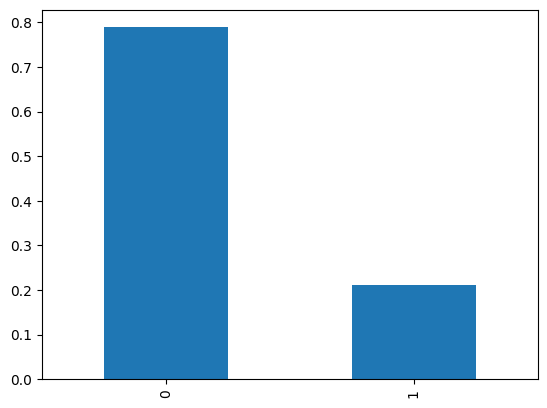

In [12]:
#PRUEBA DE CORDURA
model_tree = DecisionTreeClassifier(random_state= 12345)
model_tree.fit(features_train,target_train)
predictions_valid_tree_constant = pd.Series(model_tree.predict(features_valid)) 

class_frequency = predictions_valid_tree_constant.value_counts(normalize= True)
print(class_frequency)
class_frequency.plot(kind= 'bar')

accuracy_score(target_valid,predictions_valid_tree_constant)
precision_score(target_valid,predictions_valid_tree_constant)
recall_score(target_valid,predictions_valid_tree_constant)
f1_score(target_valid,predictions_valid_tree_constant)

print('La EXACTITUD del modelo de arbol de decision con un modelo constante es:',accuracy_score(target_valid,predictions_valid_tree_constant))
print('La PRECISION del modelo de arbol de decision con un modelo constante es:',precision_score(target_valid,predictions_valid_tree_constant))
print('La SENSIBILIDAD del modelo de arbol de decision con un modelo constante es:',recall_score(target_valid,predictions_valid_tree_constant))
print('El F1_SCORE del modelo de arbol de decision con un modelo constante es:',f1_score(target_valid,predictions_valid_tree_constant))

In [13]:
#SOBREMUESTREO
def up(features , target , repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_up = pd.concat([features_zeros] + [features_ones] * repeat)
    target_up = pd.concat([target_zeros] + [target_ones] * repeat)

    features_up , target_up = shuffle(features_up , target_up, random_state= 12345)

    return features_up , target_up

features_up , target_up = up(features_train, target_train, 10)

In [14]:
#SOBREMUESTREO
model_tree = DecisionTreeClassifier(random_state= 12345 , max_depth= 6, class_weight= 'balanced')
model_tree.fit(features_up , target_up)

predictions_valid_tree = model_tree.predict(features_valid)

accuracy_tree_v_up = accuracy_score(target_valid , predictions_valid_tree)
precision_tree_v_up = precision_score(target_valid , predictions_valid_tree)
recall_tree_v_up = recall_score(target_valid , predictions_valid_tree)
f1_tree_v_up = f1_score(target_valid , predictions_valid_tree)

print('Nueva EXACTITUD con Sobremuestreo --> ' , accuracy_tree_v_up) 
print('Nueva PRECISION con Sobremuestreo --> ' , precision_tree_v_up) 
print('Nueva SENSIBILIDAD con Sobremuestreo --> ' , recall_tree_v_up )
print('Nuevo F1_SCORE con Sobremuestreo --> ' , f1_tree_v_up)

Nueva EXACTITUD con Sobremuestreo -->  0.766
Nueva PRECISION con Sobremuestreo -->  0.46153846153846156
Nueva SENSIBILIDAD con Sobremuestreo -->  0.7177033492822966
Nuevo F1_SCORE con Sobremuestreo -->  0.5617977528089888


In [15]:
#SUBMUESTREO
def down(features , target , fraction):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_down = pd.concat([features_zeros.sample(frac = fraction , random_state= 12345)] + [features_ones])
    target_down = pd.concat([target_zeros.sample(frac = fraction , random_state= 12345)] + [target_ones])

    features_down , target_down = shuffle(features_down , target_down, random_state= 12345)

    return features_down , target_down

features_down , target_down = down(features_train, target_train, 0.1)

print(features_down.shape , target_down.shape)

(1676, 12) (1676,)


In [16]:
#SUBMUESTREO
model_tree = DecisionTreeClassifier(random_state= 12345 , max_depth= 6, class_weight= 'balanced')
model_tree.fit(features_down , target_down)

predictions_valid_tree = model_tree.predict(features_valid)

accuracy_tree_v_down = accuracy_score(target_valid , predictions_valid_tree)
precision_tree_v_down = precision_score(target_valid , predictions_valid_tree)
recall_tree_v_down = recall_score(target_valid , predictions_valid_tree)
f1_tree_v_down = f1_score(target_valid , predictions_valid_tree)

print('Nueva EXACTITUD con Submuestreo --> ' , accuracy_tree_v_down) 
print('Nueva PRECISION con Submuestreo --> ' , precision_tree_v_down) 
print('Nueva SENSIBILIDAD con Submuestreo --> ' , recall_tree_v_down )
print('Nuevo F1_SCORE con Submuestreo --> ' , f1_tree_v_down)

Nueva EXACTITUD con Submuestreo -->  0.717
Nueva PRECISION con Submuestreo -->  0.3975069252077562
Nueva SENSIBILIDAD con Submuestreo -->  0.6866028708133971
Nuevo F1_SCORE con Submuestreo -->  0.5035087719298246


**RESUMEN PARA EL MODELO ARBOL DE DECISION**

La mejor EXACTITUD con 0.8575 

La mejor PRECISION con 0.8263888888888888 

La mejor SENSIBILIDAD (recall) con 0.4880382775119617

La mejor F1_SCORE con 0.5730337078651685 

--

<u>PRUEBA DE CORDURA </u>

La EXACTITUD con un modelo constante es: 0.7855

La PRECISION con un modelo constante es: 0.48699763593380613

La SENSIBILIDAD con un modelo constante es: 0.49282296650717705

El F1_SCORE con un modelo constante es: 0.48989298454221164

--

<u>SOBREMUESTREO</u>

Nueva EXACTITUD con Sobremuestreo -->  0.766

Nueva PRECISION con Sobremuestreo -->  0.46153846153846156

Nueva SENSIBILIDAD con Sobremuestreo -->  0.7177033492822966

Nuevo F1_SCORE con Sobremuestreo -->  0.5617977528089888

--

<u>SUBMUESTREO</u>

Nueva EXACTITUD con Submuestreo -->  0.717

Nueva PRECISION con Submuestreo -->  0.3975069252077562

Nueva SENSIBILIDAD con Submuestreo -->  0.6866028708133971

Nuevo F1_SCORE con Submuestreo -->  0.5035087719298246



Hay un muy buen F1_SCORE usando un sobremuestreo en el conjunto de datos, no tenemos un 0.59, pero un 0.561 es un promedio aceptable. 
Revisemos la tasa de VP y FP para identificar si es un buen modelo o lo descartamos.


In [17]:
model_tree = DecisionTreeClassifier(random_state= 12345, max_depth= 6 , class_weight= 'balanced')
model_tree.fit(features_up, target_up)

probabilities_tree_valid = model_tree.predict_proba(features_valid)
probabilities_one_tree_valid = probabilities_tree_valid[:,1]

print('Acorde con el Modelo Arbol de Decision y un sobremuestreo, tenemos las siguientes probabilidades de que el resultado sea :\n Negativa(0) -- Positiva(1)\n'
      ,probabilities_tree_valid)

for threshold_tree in np.arange(0, 1 , 0.1):
    
    predicted_tree_valid = probabilities_one_tree_valid > threshold_tree
    #print(predicted_tree_valid)
    precision_tree_umbral = precision_score(target_valid , predicted_tree_valid)
    recall_tree_umbral = recall_score(target_valid , predicted_tree_valid)
    f1_tree_umbral = f1_score(target_valid , predicted_tree_valid)
    print('Threshold| Precision| Recall| F1_SCORE')
    print('{:.2f}     | {:.3f}    | {:.3f} | {:.3f}'.format(threshold_tree,precision_tree_umbral,recall_tree_umbral,f1_tree_umbral),'\n')

Acorde con el Modelo Arbol de Decision y un sobremuestreo, tenemos las siguientes probabilidades de que el resultado sea :
 Negativa(0) -- Positiva(1)
 [[0.97554011 0.02445989]
 [0.40882739 0.59117261]
 [0.37224397 0.62775603]
 ...
 [0.9803118  0.0196882 ]
 [1.         0.        ]
 [0.07914746 0.92085254]]
Threshold| Precision| Recall| F1_SCORE
0.00     | 0.205    | 0.976 | 0.339 

Threshold| Precision| Recall| F1_SCORE
0.10     | 0.243    | 0.950 | 0.388 

Threshold| Precision| Recall| F1_SCORE
0.20     | 0.274    | 0.919 | 0.423 

Threshold| Precision| Recall| F1_SCORE
0.30     | 0.352    | 0.813 | 0.492 

Threshold| Precision| Recall| F1_SCORE
0.40     | 0.406    | 0.756 | 0.528 

Threshold| Precision| Recall| F1_SCORE
0.50     | 0.462    | 0.718 | 0.562 

Threshold| Precision| Recall| F1_SCORE
0.60     | 0.529    | 0.593 | 0.559 

Threshold| Precision| Recall| F1_SCORE
0.70     | 0.721    | 0.488 | 0.582 

Threshold| Precision| Recall| F1_SCORE
0.80     | 0.779    | 0.447 | 0.568 


In [18]:
precision_pr_tree , recall_pr_tree , threshold_pr_tree = precision_recall_curve(
    target_valid, probabilities_one_tree_valid
)

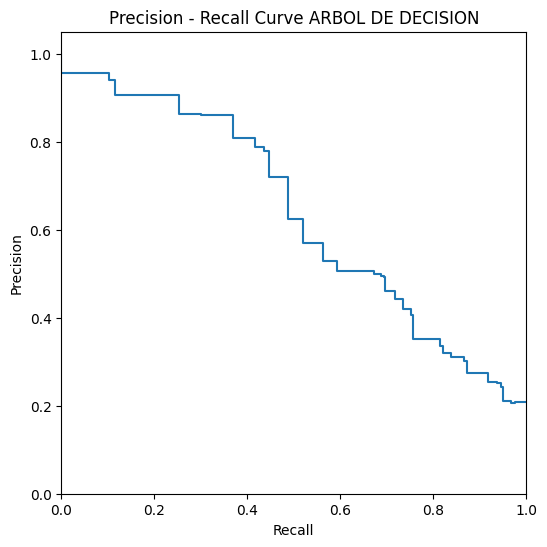

In [19]:
plt.figure(figsize = (6,6))
plt.step(recall_pr_tree, precision_pr_tree, where= 'post')
plt.xlabel('Recall')
plt.xlim([0.0 , 1.0])
plt.ylabel('Precision')
plt.ylim([0.0 , 1.05])
plt.title('Precision - Recall Curve ARBOL DE DECISION')
plt.show()

Text(0.5, 1.0, 'Curva ROC LOGISTIC REGRESSION')

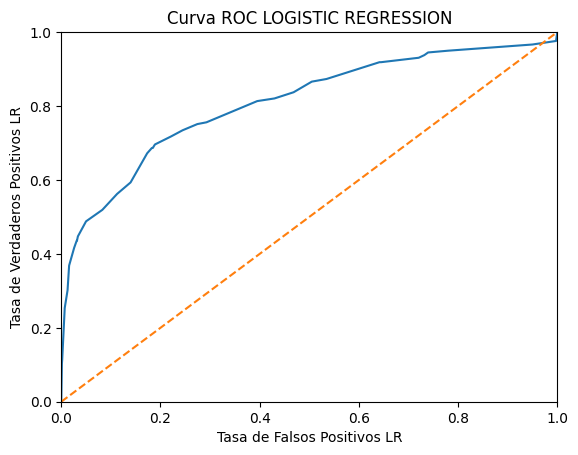

In [20]:
fpr_tree , tpr_tree , th_tree = roc_curve(target_valid , probabilities_one_tree_valid)

plt.figure()
plt.plot(fpr_tree , tpr_tree)
plt.plot([0 , 1] , [0 , 1], linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('Tasa de Falsos Positivos LR')
plt.ylabel('Tasa de Verdaderos Positivos LR')
plt.title('Curva ROC LOGISTIC REGRESSION')

In [21]:
auc_roc_tree = roc_auc_score(target_valid , probabilities_one_tree_valid)
print('AUC-ROC --> ',auc_roc_tree)

AUC-ROC -->  0.8086918321548038


**CONCLUSION ARBOL DE DECISION**

Con un AUC-ROC del 0.808 estamos muy cerca del 1, nuestro modelo es mejor que un modelo aleatorio. 
Usando un modelo de arbol de decision con una profundidad de 6 y un peso en las clases balanceada obtivimos un F1_SCORE DE 0.56
 DecisionTreeClassifier(random_state= 12345 , max_depth= 6 , class_weight= 'balanced')
La curva se puede ver bastante alta y eso da muy buena señal para este modelo. 

**RANDOM FOREST CLASSIFIER**
---
Revisemos el comportamiento de RANDOM FOREST CLASSIFIER. 
Buscando el mejor F1_SCORE POSIBLE. 



In [22]:
#Declarar variables de Bosque Aleatorio.
precision_forest_best_valid = 0
recall_forest_best_valid = 0
f1_forest_best_valid = 0
accuracy_forest_best_valid = 0

accuracy_best_model_forest = 0
f1_best_model_forest = 0
recall_best_model_forest = 0
precision_best_model_forest = 0

In [23]:
#RANDOM FOREST MODEL. MATRIZ DE CONFUSION
model_forest = RandomForestClassifier(random_state= 12345)
model_forest.fit(features_train , target_train)

predictions_train_forest = model_forest.predict(features_train)
predictions_valid_forest = model_forest.predict(features_valid)

print(confusion_matrix(target_valid , predictions_valid_forest))

[[1525   57]
 [ 228  190]]


<u>Matriz de Confusion con el modelo Bosque Aleatorio. </u>

VN 1525 || FP 57

FN  228   || VP 190 

Tenemos una buena cantidad de valores negativos, esto puede afectar la sensibilidad y la precision. Revisemos mas a detalle si podemos obtener un mejor valor. 

In [24]:
for estimator in range(1,10):

    model_forest = RandomForestClassifier(random_state= 12345 , n_estimators=estimator)
    model_forest.fit(features_train , target_train)

    predictions_train_forest = model_forest.predict(features_train)
    predictions_valid_forest = model_forest.predict(features_valid)

    accuracy_forest_train = accuracy_score(target_train , predictions_train_tree)
    accuracy_forest_valid = accuracy_score(target_valid, predictions_valid_tree)
    if(accuracy_forest_valid > accuracy_forest_best_valid) :
        accuracy_forest_best_valid = accuracy_forest_valid
        accuracy_forest_best_train = accuracy_forest_train
        accuracy_n_estimator = estimator
        accuracy_best_model_forest = model_forest


    precision_forest_train = precision_score(target_train , predictions_train_forest)
    precision_forest_valid = precision_score(target_valid, predictions_valid_forest)
    if(precision_forest_valid > precision_forest_best_valid) :
        precision_forest_best_valid = precision_forest_valid
        precision_forest_best_train = precision_forest_train
        precision_n_estimator = estimator
        precision_best_model_forest = model_forest

    recall_forest_train = recall_score(target_train , predictions_train_forest)
    recall_forest_valid = recall_score(target_valid, predictions_valid_forest)
    if(recall_forest_valid > recall_forest_best_valid) :
        recall_forest_best_valid = recall_forest_valid
        recall_forest_best_train = recall_forest_train
        recall_n_estimator = estimator
        recall_best_model_forest = model_forest

    f1_forest_train = recall_score(target_train , predictions_train_forest)
    f1_forest_valid = recall_score(target_valid, predictions_valid_forest)
    if(f1_forest_valid > f1_forest_best_valid) :
        f1_forest_best_valid = f1_forest_valid
        f1_forest_best_train = f1_forest_train
        f1_n_estimator = estimator
        f1_best_model_forest = model_forest
        f1_precision_forest = precision_forest_valid
        f1_recall_forest = recall_forest_valid

In [25]:
print(f'El modelo del arbol de decision con la mejor EXACTITUD \nen el conjuto de entrenamiento con {accuracy_forest_best_train}',
      f'\ny en el conjunto de VALIDACION con {accuracy_forest_best_valid} \nes --> {accuracy_best_model_forest}')

print(f'\nEl modelo del arbol de decision con la mejor PRECISION \nen el conjuto de entrenamiento con {precision_forest_best_train}',
      f'\ny en el conjunto de VALIDACION con {precision_forest_best_valid} \nes --> {precision_best_model_forest}')

print(f'\nEl modelo del arbol de decision con la mejor SENSIBILIDAD (recall) \nen el conjuto de entrenamiento con {recall_forest_best_train}',
      f'\ny en el conjunto de VALIDACION con {recall_forest_best_valid} \nes --> {recall_best_model_forest}')   

print(f'\nEl modelo del arbol de decision con el mejor F1_SCORE \nen el conjuto de entrenamiento con {f1_forest_best_train}',
      f'\ny en el conjunto de VALIDACION con {f1_forest_best_valid} \nes --> {f1_best_model_forest}', 
      f'\ncon {f1_precision_forest} de precision y {f1_recall_forest} de recall.')      

El modelo del arbol de decision con la mejor EXACTITUD 
en el conjuto de entrenamiento con 0.9021666666666667 
y en el conjunto de VALIDACION con 0.717 
es --> RandomForestClassifier(n_estimators=1, random_state=12345)

El modelo del arbol de decision con la mejor PRECISION 
en el conjuto de entrenamiento con 0.9922854387656702 
y en el conjunto de VALIDACION con 0.7372881355932204 
es --> RandomForestClassifier(n_estimators=6, random_state=12345)

El modelo del arbol de decision con la mejor SENSIBILIDAD (recall) 
en el conjuto de entrenamiento con 0.8252508361204013 
y en el conjunto de VALIDACION con 0.4880382775119617 
es --> RandomForestClassifier(n_estimators=1, random_state=12345)

El modelo del arbol de decision con el mejor F1_SCORE 
en el conjuto de entrenamiento con 0.8252508361204013 
y en el conjunto de VALIDACION con 0.4880382775119617 
es --> RandomForestClassifier(n_estimators=1, random_state=12345) 
con 0.45434298440979953 de precision y 0.4880382775119617 de recall.


En la SENSIBILIDAD tenemos un valor de 0.488, con un numero estimados de 1. 

Esto indica que tenemos una porcion de VP frente a las VP + FN muy bajo. 
Ya que de acuerdo con la matriz de confusion, VP + FN = 190 + 228 = 418, tenemos que se predijo correctamente aproximadamente la mitad como VP y la otra mitad como FN. 
Por esto obtuvimos un recall del modelo de casi el 50%, así que si lo comparamos con el recall de un modelo constante obtuvimos un 0.45, es decir, el modelo logra predecir ligeramente mejor que un modelo constante. 


En la PRECISION tenemos un valor de 0.737, con un numero de estimados de 6. 

Tenemos la relacion entre las predicciones VP y todas las predicciones positivas (VP + FP) que haya realizado el modelo. Por lo que, mientras mas FP se hayan predicho, menor será la precision. Tenemos 228 valores que eran positivos y el modelo los considero como negativos, sin demasionados en comparacion a los valores negativos que el modelo creyó que eran positivos (FP) -> 57.

Podemos ver que tenemos mejor precision que sensibilidad, esto es porque concidera mas la parte POSITIVA que la NEGATIVA. Sin embargo, necesitamos mejorar la SENSIBILIDAD ya que el modelo tiene que predecir SI el cliente se va del banco para poder prevenirlo, un VP o FN representan esta situacion. 

Con respecto a un modelo contantante, estamos casi igual, con una diferencia de 0.03.

En el promedio de ambos, F1_SCORE tenemos un valor de 0.48, con un maximo de estimados de 1. 

+ Con una precision de 0.454

+ Con un recall de 0.488

0    0.8765
1    0.1235
Name: proportion, dtype: float64
La EXACTITUD del modelo de arbol de decision con un modelo constante es: 0.8575
La PRECISION del modelo de arbol de decision con un modelo constante es: 0.7692307692307693
La SENSIBILIDAD del modelo de arbol de decision con un modelo constante es: 0.45454545454545453
El F1_SCORE del modelo de arbol de decision con un modelo constante es: 0.5714285714285714


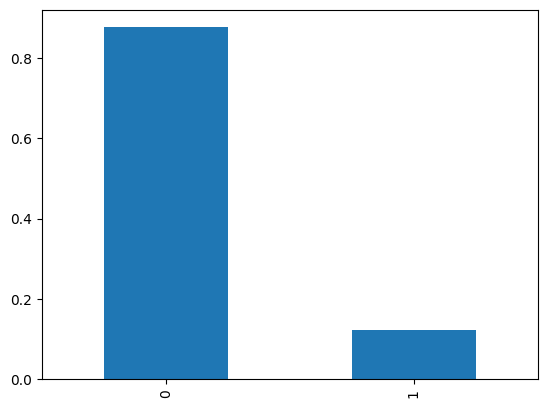

In [26]:
#PRUEBA DE CORDURA
model_forest = RandomForestClassifier(random_state= 12345)
model_forest.fit(features_train,target_train)
predictions_valid_forest_constant = pd.Series(model_forest.predict(features_valid)) 

class_frequency_forest = predictions_valid_forest_constant.value_counts(normalize= True)
print(class_frequency_forest)
class_frequency_forest.plot(kind= 'bar')

print('La EXACTITUD del modelo de arbol de decision con un modelo constante es:',accuracy_score(target_valid,predictions_valid_forest_constant))
print('La PRECISION del modelo de arbol de decision con un modelo constante es:',precision_score(target_valid,predictions_valid_forest_constant))
print('La SENSIBILIDAD del modelo de arbol de decision con un modelo constante es:',recall_score(target_valid,predictions_valid_forest_constant))
print('El F1_SCORE del modelo de arbol de decision con un modelo constante es:',f1_score(target_valid,predictions_valid_forest_constant))

In [27]:
#SOBREMUESTREO
model_forest = RandomForestClassifier(random_state= 12345 , n_estimators = 6,  class_weight= 'balanced', max_depth= 6)
model_forest.fit(features_up , target_up)

predictions_valid_forest = model_forest.predict(features_valid)

accuracy_forest_v_up = accuracy_score(target_valid , predictions_valid_forest)
precision_forest_v_up = precision_score(target_valid , predictions_valid_forest)
recall_forest_v_up = recall_score(target_valid , predictions_valid_forest)
f1_forest_v_up = f1_score(target_valid , predictions_valid_forest)

print('Nueva EXACTITUD con Sobremuestreo --> ' , accuracy_forest_v_up) 
print('Nueva PRECISION con Sobremuestreo --> ' , precision_forest_v_up) 
print('Nueva SENSIBILIDAD con Sobremuestreo --> ' , recall_forest_v_up )
print('Nuevo F1_SCORE con Sobremuestreo --> ' , f1_forest_v_up)

Nueva EXACTITUD con Sobremuestreo -->  0.7945
Nueva PRECISION con Sobremuestreo -->  0.5057851239669422
Nueva SENSIBILIDAD con Sobremuestreo -->  0.7320574162679426
Nuevo F1_SCORE con Sobremuestreo -->  0.5982404692082112


In [28]:
#SUBMUESTREO
model_forest = RandomForestClassifier(random_state= 12345 , n_estimators = 6, class_weight= 'balanced', max_depth= 6)
model_forest.fit(features_down , target_down)

predictions_valid_forest = model_forest.predict(features_valid)

accuracy_forest_v_down = accuracy_score(target_valid , predictions_valid_forest)
precision_forest_v_down = precision_score(target_valid , predictions_valid_forest)
recall_forest_v_down = recall_score(target_valid , predictions_valid_forest)
f1_forest_v_down = f1_score(target_valid , predictions_valid_forest)

print('Nueva EXACTITUD con Submuestreo --> ' , accuracy_forest_v_down) 
print('Nueva PRECISION con Submuestreo --> ' , precision_forest_v_down) 
print('Nueva SENSIBILIDAD con Submuestreo --> ' , recall_forest_v_down)
print('Nuevo F1_SCORE con Submuestreo --> ' , f1_forest_v_down)

Nueva EXACTITUD con Submuestreo -->  0.7485
Nueva PRECISION con Submuestreo -->  0.4400564174894217
Nueva SENSIBILIDAD con Submuestreo -->  0.7464114832535885
Nuevo F1_SCORE con Submuestreo -->  0.5536823425022183


**RESUMEN BOSQUE ALEATORIO**

El modelo del arbol de decision con la mejor EXACTITUD con 0.717 

El modelo del arbol de decision con la mejor PRECISION con 0.7372881355932204 


El modelo del arbol de decision con la mejor SENSIBILIDAD (recall) con 0.4880382775119617 


El modelo del arbol de decision con el mejor F1_SCORE con 0.4880382775119617 

-- 


PRUEBA DE CORDURA. 

La EXACTITUD con un modelo constante es: 0.8575

La PRECISION con un modelo constante es: 0.7692307692307693

La SENSIBILIDAD con un modelo constante es: 0.45454545454545453

El F1_SCORE con un modelo constante es: 0.5714285714285714

--

SOBREMUESTREO. RandomForestClassifier(random_state= 12345 , n_estimators = 6, class_weight= 'balanced', max_depth= 6)

Nueva EXACTITUD con Sobremuestreo -->  0.7945

Nueva PRECISION con Sobremuestreo -->  0.5057851239669422

Nueva SENSIBILIDAD con Sobremuestreo -->  0.7320574162679426

Nuevo F1_SCORE con Sobremuestreo -->  0.5982404692082112

--

SUBMUESTREO. RandomForestClassifier(random_state= 12345 , n_estimators = 6, class_weight= 'balanced', max_depth= 6)

Nueva EXACTITUD con Submuestreo -->  0.7485

Nueva PRECISION con Submuestreo -->  0.4400564174894217

Nueva SENSIBILIDAD con Submuestreo -->  0.7464114832535885

Nuevo F1_SCORE con Submuestreo -->  0.5536823425022183


Al comporar todos los resultados, podemos ver que despues de hacer un sobremuestreo, hacer arreglos en los conjutos de datos hay una buena mejora. 
Alcanzando el 0.59 de F1_SCORE.

Podemos intentar cambiar el umbral para ver si hay una mejora considerable. 

In [29]:
model_forest = RandomForestClassifier(random_state= 12345, n_estimators= 6, max_depth= 6 , class_weight= 'balanced')
model_forest.fit(features_up, target_up)

probabilities_forest_valid = model_forest.predict_proba(features_valid)
probabilities_one_forest_valid = probabilities_forest_valid[:,1]

print('Acorde con el Modelo Arbol de Decision y un sobremuestreo, tenemos las siguientes probabilidades de que el resultado sea :\n Negativa(0) -- Positiva(1)\n'
      ,probabilities_forest_valid)

for threshold_forest in np.arange(0, 1 , 0.1):
    
    predicted_forest_valid = probabilities_one_forest_valid > threshold_forest
    precision_forest_umbral = precision_score(target_valid , predicted_forest_valid)
    recall_forest_umbral = recall_score(target_valid , predicted_forest_valid)
    f1_forest_umbral = f1_score(target_valid , predicted_forest_valid)
    print('Threshold| Precision| Recall| F1_SCORE')
    print('{:.2f}     | {:.3f}    | {:.3f} | {:.3f}'.format(threshold_forest,precision_forest_umbral,recall_forest_umbral,f1_forest_umbral),'\n')

Acorde con el Modelo Arbol de Decision y un sobremuestreo, tenemos las siguientes probabilidades de que el resultado sea :
 Negativa(0) -- Positiva(1)
 [[0.81681189 0.18318811]
 [0.40870433 0.59129567]
 [0.58010596 0.41989404]
 ...
 [0.66969503 0.33030497]
 [0.32960204 0.67039796]
 [0.09532228 0.90467772]]
Threshold| Precision| Recall| F1_SCORE
0.00     | 0.209    | 1.000 | 0.346 

Threshold| Precision| Recall| F1_SCORE
0.10     | 0.212    | 1.000 | 0.350 

Threshold| Precision| Recall| F1_SCORE
0.20     | 0.248    | 0.978 | 0.396 

Threshold| Precision| Recall| F1_SCORE
0.30     | 0.297    | 0.926 | 0.450 

Threshold| Precision| Recall| F1_SCORE
0.40     | 0.384    | 0.852 | 0.530 

Threshold| Precision| Recall| F1_SCORE
0.50     | 0.506    | 0.732 | 0.598 

Threshold| Precision| Recall| F1_SCORE
0.60     | 0.626    | 0.553 | 0.587 

Threshold| Precision| Recall| F1_SCORE
0.70     | 0.757    | 0.433 | 0.551 

Threshold| Precision| Recall| F1_SCORE
0.80     | 0.850    | 0.230 | 0.362 


In [30]:
precision_pr_forest , recall_pr_forest , threshold_pr_forest = precision_recall_curve(
    target_valid, probabilities_one_forest_valid
)

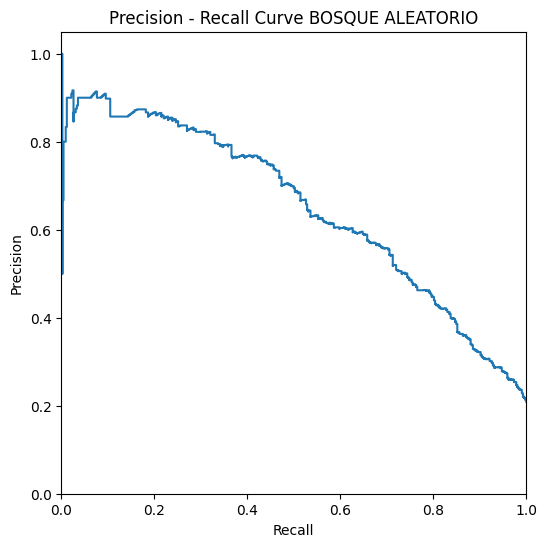

In [31]:
plt.figure(figsize = (6,6))
plt.step(recall_pr_forest, precision_pr_forest, where= 'post')
plt.xlabel('Recall')
plt.xlim([0.0 , 1.0])
plt.ylabel('Precision')
plt.ylim([0.0 , 1.05])
plt.title('Precision - Recall Curve BOSQUE ALEATORIO')
plt.show()

Text(0.5, 1.0, 'Curva ROC RANDOM FOREST')

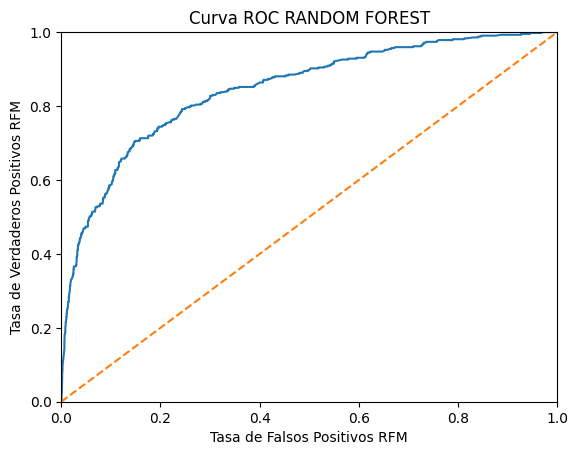

In [32]:
fpr_forest , tpr_forest , th_forest = roc_curve(target_valid , probabilities_one_forest_valid)

plt.figure()
plt.plot(fpr_forest , tpr_forest)
plt.plot([0 , 1] , [0 , 1], linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('Tasa de Falsos Positivos RFM')
plt.ylabel('Tasa de Verdaderos Positivos RFM')
plt.title('Curva ROC RANDOM FOREST')

In [33]:
auc_roc_forest = roc_auc_score(target_valid , probabilities_one_forest_valid)
print(auc_roc_forest)

0.8450994743495909


**CONCLUSION RANDOM FOREST MODEL.**

Tenemos un fuerte F1_SCORE aquí con un modelo mas especifico:
model_forest = RandomForestClassifier(random_state= 12345, n_estimators= 6, max_depth= 6 , class_weight= 'balanced')

Con un F1_SCORE DE 0.598 

Con un AUC-ROC  DE 0.84

Con estos valores podemos hacer uso de este modelo para predecir de mejor manera las salidas de los clientes y así poder prevenirlas. 

**LINEAL REGRESSION**
---


In [34]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns= data.columns)

In [35]:
features_ordinal = data_ordinal.drop(['Exited','Surname','RowNumber'],axis= 1)
target_ordinal = data_ordinal['Exited']
features_train_o , features_valid_test_o , target_train_o , target_valid_test_o = train_test_split(features_ordinal, target_ordinal, test_size =0.4 , random_state = 12345)
features_valid_o , features_test_o , target_valid_o , target_test_o = train_test_split(features_valid_test_o, target_valid_test_o, test_size =0.5 , random_state = 12345)

print('Nuestro conjunto de caracteristicas para entrenamiento tiene un cantidad de valores: ',features_train_o.shape)
print('Nuestro conjunto de objetivo para entrenamiento tiene un cantidad de valores: ',target_train_o.shape)
print('\nNuestro conjunto de caracteristicas para validacion tiene un cantidad de valores: ',features_valid_o.shape)
print('Nuestro conjunto de objetivo para validacion tiene un cantidad de valores: ',target_valid_o.shape)
print('\nNuestro conjunto de caracteristicas para prueba tiene un cantidad de valores: ',features_test_o.shape)
print('Nuestro conjunto de objetivo para prueba tiene un cantidad de valores: ',target_test_o.shape)

display(features_train_o.head())

Nuestro conjunto de caracteristicas para entrenamiento tiene un cantidad de valores:  (6000, 11)
Nuestro conjunto de objetivo para entrenamiento tiene un cantidad de valores:  (6000,)

Nuestro conjunto de caracteristicas para validacion tiene un cantidad de valores:  (2000, 11)
Nuestro conjunto de objetivo para validacion tiene un cantidad de valores:  (2000,)

Nuestro conjunto de caracteristicas para prueba tiene un cantidad de valores:  (2000, 11)
Nuestro conjunto de objetivo para prueba tiene un cantidad de valores:  (2000,)


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,4247.0,176.0,2.0,1.0,17.0,8.0,5562.0,0.0,1.0,0.0,4416.0
3411,9995.0,320.0,0.0,0.0,19.0,8.0,2688.0,0.0,0.0,0.0,3997.0
6027,9350.0,459.0,1.0,1.0,26.0,3.0,4859.0,1.0,0.0,1.0,9319.0
1247,5819.0,121.0,0.0,1.0,6.0,6.0,0.0,1.0,1.0,0.0,1853.0
3716,5350.0,274.0,1.0,0.0,9.0,2.0,5276.0,0.0,0.0,0.0,9362.0


In [36]:
numerics_o = ['CustomerId','CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Geography','Gender']
scaler = StandardScaler()
scaler.fit(features_train_o[numerics_o])

features_train_o[numerics_o] = scaler.transform(features_train_o[numerics_o])
features_valid_o[numerics_o] = scaler.transform(features_valid_o[numerics_o])
features_test_o[numerics_o] = scaler.transform(features_test_o[numerics_o])

display(features_train_o.head())

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,-0.265492,-0.888356,1.507307,0.907278,-0.373277,1.082277,1.663957,-0.891560,0.642466,-1.055187,-0.190775
3411,1.722692,0.608996,-0.900852,-1.102198,-0.183370,1.082277,0.309701,-0.891560,-1.556504,-1.055187,-0.335352
6027,1.499592,2.054357,0.303227,0.907278,0.481302,-0.737696,1.332696,0.830152,-1.556504,0.947699,1.501017
1247,0.278249,-1.460262,-0.900852,0.907278,-1.417761,0.354288,-0.956910,0.830152,0.642466,-1.055187,-1.075144
3716,0.116026,0.130675,0.303227,-1.102198,-1.132902,-1.101690,1.529191,-0.891560,-1.556504,-1.055187,1.515855


In [37]:
#Lineal Regression
model_regression = LogisticRegression(random_state= 12345, solver='liblinear')
model_regression.fit(features_train_o , target_train_o)

predictions_train_regression = model_regression.predict(features_train_o)
predictions_valid_regression = model_regression.predict(features_valid_o)

print(confusion_matrix(target_valid_o , predictions_valid_regression))

[[1531   51]
 [ 344   74]]


Para el modelo Regresion Logistica tenemos una matriz de confusion de:

1531 VN || 51 FP

344 FN  || 74 VP  

Tenemos 1582 valores con una correcta prediccion, y 418 valores predichos erroneamente. 
Parace que no pudo predecir ningun valor Verdadero Positivo, simplemente calculo todo como negativo, indica que tenemos una sobre carga en los VERDADEROS NEGATIVOS.

In [38]:
accuracy_regression_t = accuracy_score(target_train_o , predictions_train_regression)
precision_regression_t = precision_score(target_train_o , predictions_train_regression)
recall_regression_t = recall_score(target_train_o , predictions_train_regression)
f1_regression_t = f1_score(target_train_o , predictions_train_regression)

accuracy_regression_v = accuracy_score(target_valid_o , predictions_valid_regression)
precision_regression_v = precision_score(target_valid_o , predictions_valid_regression)
recall_regression_v = recall_score(target_valid_o , predictions_valid_regression)
f1_regression_v = f1_score(target_valid_o , predictions_valid_regression)

In [39]:
print(f'El modelo Regresion Logistica tiene una EXACTITUD \nen el conjuto de entrenamiento con {accuracy_regression_t}',
      f'\ny en el conjunto de VALIDACION con {accuracy_regression_v}')

print(f'\nEl modelo Regresion Logistica con la mejor PRECISION \nen el conjuto de entrenamiento con {precision_regression_t}',
      f'\ny en el conjunto de VALIDACION con {precision_regression_v}')

print(f'\nEl modelo Regresion Logistica con la mejor SENSIBILIDAD (recall) \nen el conjuto de entrenamiento con {recall_regression_t}',
      f'\ny en el conjunto de VALIDACION con {recall_regression_v}')

print(f'\nEl modelo Regresion Logistica con el mejor F1 \nen el conjuto de entrenamiento con {f1_regression_t}',
      f'\ny en el conjunto de VALIDACION con {f1_regression_v}')

El modelo Regresion Logistica tiene una EXACTITUD 
en el conjuto de entrenamiento con 0.8151666666666667 
y en el conjunto de VALIDACION con 0.8025

El modelo Regresion Logistica con la mejor PRECISION 
en el conjuto de entrenamiento con 0.6172506738544474 
y en el conjunto de VALIDACION con 0.592

El modelo Regresion Logistica con la mejor SENSIBILIDAD (recall) 
en el conjuto de entrenamiento con 0.19147157190635453 
y en el conjunto de VALIDACION con 0.17703349282296652

El modelo Regresion Logistica con el mejor F1 
en el conjuto de entrenamiento con 0.29227823867262287 
y en el conjunto de VALIDACION con 0.27255985267034993


La mejor PRECISION obtenida fue de 0.59

La mejor SENBILIDAD obtenida fue de 0.177

0.0    0.9375
1.0    0.0625
Name: proportion, dtype: float64
La EXACTITUD del modelo de regresion logistica con un modelo constante es: 0.8025
La PRECISION del modelo de regresion logistica con un modelo constante es: 0.592
La SENSIBILIDAD del modelo de regresion logistica con un modelo constante es: 0.17703349282296652
El F1_SCORE del modelo de regresion logistica con un modelo constante es: 0.27255985267034993


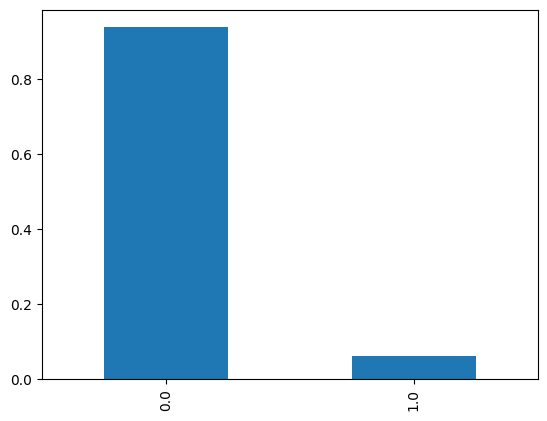

In [40]:
#PRUEBA DE CORDURA
model_regression = LogisticRegression(random_state= 12345, solver='liblinear')
model_regression.fit(features_train_o , target_train_o)

predictions_valid_regression_constant = pd.Series(model_regression.predict(features_valid_o)) 

class_frequency_regression = predictions_valid_regression_constant.value_counts(normalize= True)
print(class_frequency_regression)
class_frequency_regression.plot(kind= 'bar')

print('La EXACTITUD del modelo de regresion logistica con un modelo constante es:',accuracy_score(target_valid_o,predictions_valid_regression_constant))
print('La PRECISION del modelo de regresion logistica con un modelo constante es:',precision_score(target_valid_o,predictions_valid_regression_constant))
print('La SENSIBILIDAD del modelo de regresion logistica con un modelo constante es:',recall_score(target_valid_o,predictions_valid_regression_constant))
print('El F1_SCORE del modelo de regresion logistica con un modelo constante es:',f1_score(target_valid_o,predictions_valid_regression_constant))

**SOBREMUESTREO EN LOGISTIC REGRESSION MODEL.**

Haremos una prueba con el sobremuestreo en el conjunto de entrenamiento para mejorar el F1_SCORE. 

In [41]:
features_zeros_regression = features_train_o[target_train_o == 0]
features_ones_regression = features_train_o[target_train_o == 1]
target_zeros_regression = target_train_o[target_train_o == 0]
target_ones_regression = target_train_o[target_train_o == 1]

print(f'Tenemos {features_zeros_regression.shape} ceros en las carateristicas.\n')
print(f'Tenemos {features_ones_regression.shape} unos en las caracteristicas.\n')
print(f'Tenemos {target_zeros_regression.shape} ceros en el objetivo.\n')
print(f'Tenemos {target_ones_regression.shape} unos en el objetivo.')

Tenemos (4804, 11) ceros en las carateristicas.

Tenemos (1196, 11) unos en las caracteristicas.

Tenemos (4804,) ceros en el objetivo.

Tenemos (1196,) unos en el objetivo.


Parece que tenemos un valor muy bajo en los ejemplos positivos, en proporcion tenemos un 80% de ejemplos negativos, donde los clientes no se han ido y un 20% de ejemplos positivos donde los clientes se han ido. 

In [42]:
def up(features , target , repeat):

    features_zeros_regression = features[target == 0]
    features_ones_regression = features[target == 1]
    target_zeros_regression = target[target == 0]
    target_ones_regression = target[target == 1]

    features_up_regression = pd.concat([features_zeros_regression] + [features_ones_regression] * repeat)
    target_up_regression = pd.concat([target_zeros_regression] + [target_ones_regression] * repeat)

    features_up_regression , target_up_regression = shuffle(features_up_regression , target_up_regression, random_state= 12345)

    return features_up_regression , target_up_regression

features_up_regression , target_up_regression = up(features_train_o, target_train_o, 10)

In [43]:
model_regression = LogisticRegression(random_state= 12345, solver='liblinear', class_weight= 'balanced')
model_regression.fit(features_up_regression , target_up_regression)

predictions_valid_regression = model_regression.predict(features_valid_o)

accuracy_regression_v_up = accuracy_score(target_valid_o , predictions_valid_regression)
precision_regression_v_up = precision_score(target_valid_o , predictions_valid_regression)
recall_regression_v_up = recall_score(target_valid_o , predictions_valid_regression)
f1_regression_v_up = f1_score(target_valid_o , predictions_valid_regression)

print('Nueva EXACTITUD con Sobremuestreo --> ',accuracy_regression_v_up) 
print('Nueva PRECISION con Sobremuestreo --> ',precision_regression_v_up) 
print('Nueva SENSIBILIDAD con Sobremuestreo --> ',recall_regression_v_up )
print('Nuevo F1_SCORE con Sobremuestreo --> ',f1_regression_v_up)

Nueva EXACTITUD con Sobremuestreo -->  0.6875
Nueva PRECISION con Sobremuestreo -->  0.3650586701434159
Nueva SENSIBILIDAD con Sobremuestreo -->  0.6698564593301436
Nuevo F1_SCORE con Sobremuestreo -->  0.47257383966244726


**SUBMUESTREO EN LOGISTIC REGRESSION MODEL.**

Haremos una prueba con el submuestreo en el conjunto de entrenamiento para mejorar el F1_SCORE. 

In [44]:
def down(features , target , fraction):

    features_zeros_regression = features[target == 0]
    features_ones_regression = features[target == 1]
    target_zeros_regression = target[target == 0]
    target_ones_regression = target[target == 1]

    features_down_regression = pd.concat([features_zeros_regression.sample(frac = fraction , random_state= 12345)] + [features_ones_regression])
    target_down_regression = pd.concat([target_zeros_regression.sample(frac = fraction , random_state= 12345)] + [target_ones_regression])

    features_down_regression , target_down_regression = shuffle(features_down_regression , target_down_regression, random_state= 12345)

    return features_down_regression , target_down_regression

features_down_regression , target_down_regression = down(features_train_o, target_train_o, 0.1)

print(features_down_regression.shape , target_down_regression.shape)

(1676, 11) (1676,)


In [45]:
model_regression = LogisticRegression(random_state= 12345, solver='liblinear', class_weight= 'balanced')
model_regression.fit(features_down_regression , target_down_regression)

predictions_valid_regression = model_regression.predict(features_valid_o)

accuracy_regression_v_down = accuracy_score(target_valid_o , predictions_valid_regression)
precision_regression_v_down = precision_score(target_valid_o , predictions_valid_regression)
recall_regression_v_down = recall_score(target_valid_o , predictions_valid_regression)
f1_regression_v_down = f1_score(target_valid_o , predictions_valid_regression)

print('Nueva EXACTITUD con Submuestreo --> ',accuracy_regression_v_down) 
print('Nueva PRECISION con Submuestreo --> ',precision_regression_v_down) 
print('Nueva SENSIBILIDAD con Submuestreo --> ',recall_regression_v_down )
print('Nuevo F1_SCORE con Submuestreo --> ',f1_regression_v_down)

Nueva EXACTITUD con Submuestreo -->  0.688
Nueva PRECISION con Submuestreo -->  0.3676092544987147
Nueva SENSIBILIDAD con Submuestreo -->  0.6842105263157895
Nuevo F1_SCORE con Submuestreo -->  0.4782608695652174


**RESUMEN REGRESION LOGISTICA**

El modelo Regresion Logistica tiene una EXACTITUD con 0.8025

El modelo Regresion Logistica con la mejor PRECISION con 0.592

El modelo Regresion Logistica con la mejor SENSIBILIDAD (recall) con 0.17703349282296652

El modelo Regresion Logistica con el mejor F1 con 0.27255985267034993

--

La EXACTITUD con un modelo constante es: 0.8025

La PRECISION con un modelo constante es: 0.592

La SENSIBILIDAD con un modelo constante es: 0.17703349282296652

El F1_SCORE con un modelo constante es: 0.27255985267034993

--

Nueva EXACTITUD con Sobremuestreo -->  0.6875

Nueva PRECISION con Sobremuestreo -->  0.3650586701434159

Nueva SENSIBILIDAD con Sobremuestreo -->  0.6698564593301436

Nuevo F1_SCORE con Sobremuestreo -->  0.47257383966244726

--

Nueva EXACTITUD con Submuestreo -->  0.688

Nueva PRECISION con Submuestreo -->  0.3676092544987147

Nueva SENSIBILIDAD con Submuestreo -->  0.6842105263157895

Nuevo F1_SCORE con Submuestreo -->  0.4782608695652174

--

Hay una mejora despues de haber hecho un Submuestro y Sobremuestreo, podemos comparar con respecto al modelo pricipal con sus valores por defecto que ha mejorado bastante al balancear el cojunto de datos del objetivo. 


In [46]:
model_regression = LogisticRegression(random_state= 12345, solver='liblinear', class_weight= 'balanced')
model_regression.fit(features_down_regression , target_down_regression)

probabilities_regression_valid = model_regression.predict_proba(features_valid_o)
probabilities_one_regression_valid = probabilities_regression_valid[:,1]

print('Acorde con el Model LogicticRegression y un submuestreo, tenemos las siguientes probabilidades de que el resultado sea :\n Negativa(0) -- Positiva(1)\n'
      ,probabilities_regression_valid)

for threshold in np.arange(0, 1 , 0.1):
    
    predicted_regression_valid = probabilities_one_regression_valid > threshold
    #print(predicted_regression_valid)
    precision_regression_umbral = precision_score(target_valid_o , predicted_regression_valid)
    recall_regression_umbral = recall_score(target_valid_o , predicted_regression_valid)
    f1_regression_umbral = f1_score(target_valid_o , predicted_regression_valid)
    print('Threshold| Precision| Recall| F1_SCORE')
    print('{:.2f}     | {:.3f}    | {:.3f} | {:.3f}'.format(threshold,precision_regression_umbral,recall_regression_umbral,f1_regression_umbral),'\n')

Acorde con el Model LogicticRegression y un submuestreo, tenemos las siguientes probabilidades de que el resultado sea :
 Negativa(0) -- Positiva(1)
 [[0.62547364 0.37452636]
 [0.58536181 0.41463819]
 [0.75046499 0.24953501]
 ...
 [0.59240229 0.40759771]
 [0.28513161 0.71486839]
 [0.29157807 0.70842193]]
Threshold| Precision| Recall| F1_SCORE
0.00     | 0.209    | 1.000 | 0.346 

Threshold| Precision| Recall| F1_SCORE
0.10     | 0.216    | 1.000 | 0.355 

Threshold| Precision| Recall| F1_SCORE
0.20     | 0.242    | 0.976 | 0.388 

Threshold| Precision| Recall| F1_SCORE
0.30     | 0.277    | 0.907 | 0.424 

Threshold| Precision| Recall| F1_SCORE
0.40     | 0.318    | 0.816 | 0.458 

Threshold| Precision| Recall| F1_SCORE
0.50     | 0.368    | 0.684 | 0.478 

Threshold| Precision| Recall| F1_SCORE
0.60     | 0.417    | 0.550 | 0.475 

Threshold| Precision| Recall| F1_SCORE
0.70     | 0.476    | 0.395 | 0.431 

Threshold| Precision| Recall| F1_SCORE
0.80     | 0.494    | 0.208 | 0.293 

T

Podemos ver que mientras menor sea nuestra precision, mayor será nuestra sensibilidad.
Con un umbral normal de 0.5 tenemos una division interesante, ya que mientras subimos apartir de 0.5 vemos que la precision aumenta y la sensibilidad diminuye y miestras bajamos apartir de 0.5 pasa lo contratio. Esto es porque mientras el threshold aumente, la probabilidad de que el objetivo sea negativo aumenta y mientas bajamos el umbral la probalidad de que la respuesta sea positiva aumenta. 

La sensibilidad califica todas las respuestas positivas que se hayan predicho, sean correctas o no. Da un valor sobre todos los VP que se obtivieron sobre todos los valores que realmente son postivos. Entonces al aumentar la probabilidad de obtener respuestas positivas, por ende tendremos mejor sensibilidad. 

En el caso de la precision hacemos una comparacion entre las respuestas VP y las respues que son VP y las que se predijeron como positivas pero eran negativas. Por lo que, tenemos menor precision cuando aumentamos la probabilidad de que sean positivas porque le estamos aumentando el umbral a la posibilidad de que los clientes se vayan. 

In [47]:
precision_pr_regression , recall_pr_regression , threshold_pr_regression = precision_recall_curve(
    target_valid_o, probabilities_one_regression_valid
)

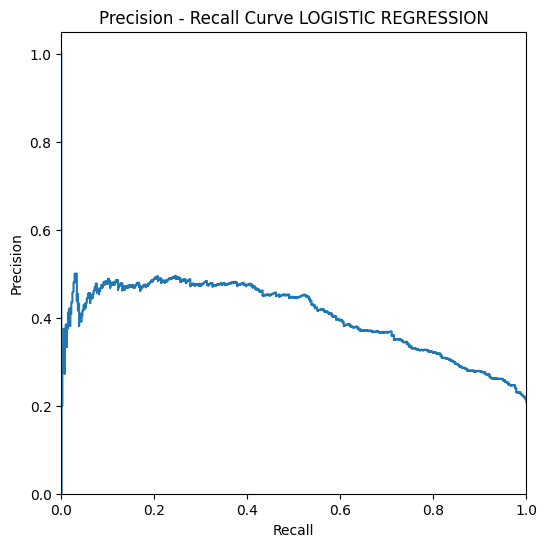

In [48]:
plt.figure(figsize = (6,6))
plt.step(recall_pr_regression, precision_pr_regression, where= 'post')
plt.xlabel('Recall')
plt.xlim([0.0 , 1.0])
plt.ylabel('Precision')
plt.ylim([0.0 , 1.05])
plt.title('Precision - Recall Curve LOGISTIC REGRESSION')
plt.show()

Text(0.5, 1.0, 'Curva ROC LOGISTIC REGRESSION')

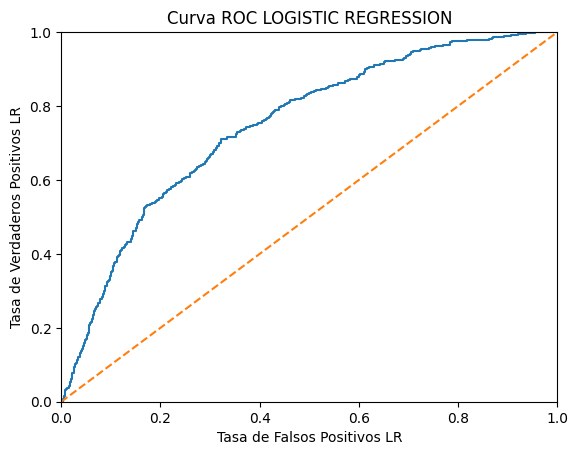

In [49]:
fpr_regression , tpr_regression , th_regression = roc_curve(target_valid_o , probabilities_one_regression_valid)

plt.figure()
plt.plot(fpr_regression , tpr_regression)
plt.plot([0 , 1] , [0 , 1], linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('Tasa de Falsos Positivos LR')
plt.ylabel('Tasa de Verdaderos Positivos LR')
plt.title('Curva ROC LOGISTIC REGRESSION')

In [50]:
auc_roc_regression = roc_auc_score(target_valid_o , probabilities_one_regression_valid)
print(auc_roc_regression)

0.7470693023790369


**CONCLUSION REGRESION LOGISTICA**

Hubo una mejora en el F1_SCORE en el modelo Regresion Logistica desde los valores por defecto y con un conjunto debalanceado, terminando con un 0.478.
Es el mas bajo dentro de los 3 modelos estudiados, sin embargo fue el que tuvo una gran mejora despues de hacer un balance en los datos.

De igual forma, en comparacion con un modelo constante y uno aleatorio, esta por arriba. Con un AUC-ROC de 0.747.

CONCLUSIONES GENERALES
---

Para elegir un modelo que haga la mejor prediccion respecto a si un cliente se irá o no se revisaron 3 modelos distintos que cumplian con el objetivo del Banco. 
Se trabajaron los datos para balancearlos, se revisaron direfentes metricas para calificarlos. 

Despues de entrenar y validar varios modelos, el mejor F1_SCORE fue del 0.598 con el modelo de Arbol aleatorio. 
Probemos que el modelo es funcional con el conjunto de prueba:

In [51]:
model_forest = RandomForestClassifier(random_state= 12345, n_estimators= 6, max_depth= 9 , class_weight= 'balanced')
model_forest.fit(features_up, target_up)

predictions_test_forest_final = model_forest.predict(features_test)
precision_final = precision_score(target_test , predictions_test_forest_final)
recall_final = recall_score(target_test , predictions_test_forest_final)
f1_final = f1_score(target_test , predictions_test_forest_final)
print('Como prueba final, probamos nuestro modelo entrenado \n{} \ncon el conjunto de prurba obteniendo:\nPrecision: {:.3f} \nRecall: {:.3f} \nF1_SCORE: {:.3f} '.
      format(model_forest,precision_final,recall_final,f1_final))

Como prueba final, probamos nuestro modelo entrenado 
RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=6,
                       random_state=12345) 
con el conjunto de prurba obteniendo:
Precision: 0.535 
Recall: 0.709 
F1_SCORE: 0.610 
